#Ονομαεπώνυμο: Μαρκουλέσκου Έλενα-Μπιάνκα
#Αρ. Μητρώου: 03115126
#Ομάδα: Α46

# Άσκηση 3: Βελτιστοποίηση συναρτήσεων με Γενετικούς Αλγόριθμους

<img src="http://infinity77.net/global_optimization/_images/Alpine01.png" alt="Alpine01" style="width: 500px;"/>

Στόχος της άσκησης είναι η βελτιστοποίηση συναρτήσεων χωρίς παραγώγους (derivative free optimization) με χρήση Γενετικών Αλγόριθμων μέσω της βιβλιοθήκης DEAP.

## Συναρτήσεις προς βελτιστοποίηση

Καλούμαστε να **ελαχιστοποιήσουμε** τις συναρτήσεις **(60)Gulf Research Problem** (1o Μέρος) και **Csendes Function** (2ο Μέρος) 

In [2]:
!pip install deap

    100% |████████████████████████████████| 942kB 19.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/22/ea/bf/dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
Successfully built deap


In [0]:
import numpy as np
import math
import time
from deap import base, creator, tools, algorithms


## Μέρος 1. Βελτιστοποίηση μη κλιμακούμενης συνάρτησης


Η συνάρτηση προς ελαχιστοποίηση για αυτό το πρόβλημα είναι η **Gulf Research Problem** η οποία ορίζεται ως εξής:

$ f(x) = \sum_{i=0}^{99}[exp(\frac{-(u_i-x_2)^{x_3}}{x_1})-0.01i]^2$ 

με $u_i=25+[-50ln(0.01i)]^{1/1.5}$ 

και $0.1 \leq x_1 \leq 100, 0 \leq x_2 \leq 25.6, 0 \leq x_3 \leq 5$

Η παραπάνω συνάρτηση έχει ελάχιστο $f(X)=0$ για $X=[50,25,1.5]$


### Εύρεση βέλτιστου συνδυασμού τελεστών - στρατηγικής


Επειδή στις διαφορετικές διαστάσεις έχουμε και διαφορετικούς περιορισμούς ορίζουμε την παρακάτω συνάρτηση **InitIndividual()** η οποία θα μας βοηθήσει να αρχικοποιήσουμε τον πληθυσμό μας με τις κατάλληλες τιμές.

Επειδή η συνάρτησή μας έχει 3 μεταβλητές προφανώς το κάθε άτομο του πληθυσμού θα αποτελείται από 3 γονίδια.


In [0]:
def InitIndividual():
  #dimension 1
  x1min = 0.1
  x1max = 100
  
  #dimension 2
  x2min = 0
  x2max = 25.6
  
  #dimension 3
  x3min = 0
  x3max = 5
  
  ind1 = np.random.uniform(x1min, x1max)
  ind2 = np.random.uniform(x2min, x2max)
  ind3 = np.random.uniform(x3min, x3max)
  
  return ind1, ind2, ind3

Στη συνέχεια ορίζουμε τη Fitenss1 η οποία κληρονομεί απ' τη base.Fitness και ορίζουμε το βάρος της ως **-1.0** αφού πρόκειται για ελαχιστοποίηση. Ο Individual θα κληρονομεί από τον IndividualContainer και θα είναι μια **λίστα** με fitness όπως ορίσαμε παραπάνω. Θα αρχικοποιείται μέσω της παραπάνω συνάρτησης. Ο πλυθυσμός θα είναι μια λίστα από Individuals.

In [0]:
numVariables = 3 

creator.create( "Fitness1", base.Fitness , weights=(-1.0,))
creator.create( "IndividualContainer", list, fitness= creator.Fitness1)

toolbox1 = base.Toolbox()
toolbox1.register( "InitialValues", InitIndividual)
toolbox1.register( "indiv", tools.initIterate, creator.IndividualContainer, toolbox1.InitialValues)
toolbox1.register( "population", tools.initRepeat, list , toolbox1.indiv)



In [5]:
ind = toolbox1.indiv()
print(ind)

[33.573713980078956, 14.884355666327892, 1.95512158579779]


Υλοποιούμε τη συνάρτηση **evalGulfProblem()** όπως ορίστηκε παραπάνω η οποία αποτελεί τη συνάρτηση καταλληλότητας. Παρατηρούμε πως για $Χ=[50,25,1.5]$ η συνάρτηση δε μας δίνει ακριβώς το ελάχιστο που περιμένουμε, ωστόσο η απόκλιση είναι αμελητέα. Την τροποποιούμε με τη DeltaPenalty. H συνάρτηση εγκυρότητας είναι η **feasible()** η οποία ορίζει πως ένα άτομο είναι έγκυρο αν όλα του τα γονίδια βρίσκονται εντός των περιορισμών. Για τα μη έγκυρα άτομα ορίζουμε τη **distance()** η οποία επιστρέφει την ευκλείδια απόσταση από τα αντίστοιχα άκρα των διαστημάτων. 

In [0]:
def u(i):
  return 25+(-50*math.log(0.01*i))**(1/1.5)


def evalGulfProblem( indiv ):
  summ = 0
  for i in range (1, 100):
    summ = summ + (math.exp(-((u(i)-indiv[1])**indiv[2])/indiv[0])-0.01*i)**2
  return (summ,)


In [7]:
a = evalGulfProblem([50,25,1.5])
print(a)

(8.46641812818167e-31,)


In [0]:
#dimension 1
x1min = 0.1
x1max = 100
  
#dimension 2
x2min = 0
x2max = 25.6
  
#dimension 3
x3min = 0
x3max = 5
  
MIN_BOUND = np.array([x1min, x2min, x3min])
MAX_BOUND = np.array([x1max, x2max, x3max])
#print(MIN_BOUND)
#print(MAX_BOUND)

def feasible( indiv ):
    if any(indiv < MIN_BOUND) or any(indiv > MAX_BOUND):
        return False
    return True

def distance( indiv ) :
    dist = 0.0
    for i in range (len( indiv )) :
        penalty = 0
        if ( indiv [i] < MIN_BOUND[i]) : penalty = (MIN_BOUND[i] - indiv[i])**2
        if ( indiv [i] > MAX_BOUND[i]) : penalty = (indiv[i] - MAX_BOUND[i])**2
        dist = dist + penalty
    dist=np.sqrt(dist)
    return dist

In [0]:
toolbox1.register( "evaluate", evalGulfProblem)
toolbox1.decorate( "evaluate", tools.DeltaPenality(feasible, [200, 50, 10], distance))

Για να διαλέξουμε την **κατάλληλη στρατηγική** θα χρειαστεί να ορίσουμε τις ακόλουθες συναρτήσεις:


---


**register_toolbox**: Δέχεται ως όρισμα ένα toolbox και ανάλογα με το 2ο και 3ο όρισμα διαλέγει για αυτό το toolbox μια απ' τις δύο μεθόδους διασταύρωσης και μετάλλαξης. Για τα παραδείγματά μας έχουμε διαλέξει τις εξής μεθόδους:

**Διασταύρωση**
*   **cxUniform**: Πραγματοποιεί μια ομοιόμορφη διασταύρωση ανάμεσα σε 2 άτομα. Η πιθανόητα indpb είναι η πιθανότητα του κάθε γονιδίου να διασταυρωθεί, σε περίπτωση που δύο άτομα επιλεγούν για διασταύρωση.
*   **cxBlend**: Aνακατεύει το γενετικό υλικό των γονέων $x_1$ και $x_2$ σε κάθε διάσταση $i$ με τυχαίο τρόπο και ανάλογο της παραμέτρου $\alpha$, όπως έχει οριστεί στο εργαστήριο. Μεγαλύτερο $α$ δίνει μεγαλύτερη ανάμιξη του γενετικού υλικού.

**Μετάλλαξη**
* **mutGaussian**: Πραγματοποιεί Γκαουσιανή μετάλλαξη με μέσο mu και τυπική απόκλιση sigma. Ως mu ορίζουμε τα μέσα των διαστημάτων για τα οποία ορίζεται η συνάρτησή μας και ως sigma θέτουμε 1.0. Η πιθανόητα indpb είναι η πιθανότητα του κάθε γονιδίου ξεχωριστά να μεταλλαχτεί, σε περίπτωση που επιλεγεί σε μετάλλαξη.
* **mutUniformInt**: Αντικαθιστά το κάθε γονίδιο του ατόμου (με πιθανότητα indpb) με έναν ακέραιο αριθμό από το διάστημα [low,high] που ορίσαμε ως τις ακέραιες προσεγγίσεις των διαστημάτων για τα οποία η συνάρτησή μας ορίζεται. Διαλέξαμε αυτόν τον τελεστή διότι το ελάχιστο του Gulf Research Problem βρίσκεται στο [50,25,1.5], δηλαδή οι 2 από τις 3 συντεταγμένες είναι ακέραιοι αριθμοί. Έτσι συμπεράναμε την καταλληλότητα αυτού του τελεστή.

Τα υπόλοιπα ορίσματα της register_toolbox αφορούν στις υπερπαραμέτρους που δέχονται οι μέθοδοι διασταύρωσης και μετάλλαξης καθώς και ο τελεστής επιλογής selTournament.

---
**rounds_analysis()**: Αυτή είναι η κύρια συνάρτησή μας. Για συγκεκριμένο αρχικό πληθυσμό του toolboox η συνάρτηση αυτή τρέχει έναν από τους 3 αλγορίθμους τους οποίους καλούμαστε να δοκιμάσουμε για συγκεκριμένους γύρους, κρατώντας παράλληλα τα στατιστικά στοιχεία (τις γενιές, τις αποτιμήσεις καταλληλότητας και το min) και το χρόνο εκτέλεσης του κάθε αλγορίθμου. Στο τέλος των γύρων βρίσκει τον μέσο όρο των ελαχίστων (σε κάθε γύρο το ελάχιστο είναι το τελευταίο στοιχείο της στήλης "min" του Logbook), καθώς και το μέσο όρο των αποτιμήσεων όλων των γενιών κάθε γύρου αλλά και του χρόνου. 

Αν το avg_min είναι μικρότερο από μια τιμή **GOAL+DELTA** που ορίζουμε εκ των προτέρων τότε σημειώνουμε την επιτυχία αυξάνοντας τη μεταβλητή *successes* και ψάχνουμε να βρούμε την πρώτη γενιά και τιμή για την οποία ο μέσος όρος έπεσε κάτω από *GOAL+DELTA*. Σημειώνουμε τη γενιά, τη μικρότερη τιμή αυτή και τις συνολικές αποτιμήσεις μέχρι εκείνο το σημείο. Στο τέλος των γύρων βρίσκουμε τις μέσες τιμές, αν αυτές ορίζονται.

Γυρίζουμε τις παραπάνω τιμές έτσι ώστε να μπορέσουμε να τις εισάγουμε σε συγκεντρωτικό πίνακα.
___
**update_stats()**: Ενημερώνει τον πίνακα χαρακτήρων *statistics* με τις παραπάνω τιμές και με μορφή όπως στο παράδειγμα που δώθηκε στην εκφώνηση. 

Σημειώνουμε εδώ πως ο πίνακας αυτός έχει αρχικές τιμές *None*, οποίες παραμένουν *None* στις στήλεις *s.avg.min, s.avg.evals, s.avg.gens* στην περίπτωση που η παραπάνω συνάρτηση δε σημειώσει καμία επιτυχία.
___
**print_stats()**: Τυπώνει τον παραπάνω πίνακα, αφού πρώτα τον μετατρέψει σε pandas DataFrame και του προσθέσει κατάλληλες ετικέτες στην πρώτη γραμμή. Η μετατροπή σε DataFrame μας εξυπηρετεί στο να μπορέσουμε να αποθηκεύσουμε ολόκληρο τον πίνακα σε csv, σε περίπτωση που το επιθυμούμε, και να τον έχουμε για πιθανή μελλοντική χρήση. 

Η επέκταση .to_string() στην προτελευταία γραμμή χρησιμεύει στο να εμφανίζεται ο πίνακας στην οθόνη με ωραίο τρόπο.
___
**evolve()**: Για συγκεκριμένους συνδυασμούς τελεστών διασταύρωσης και μετάλλαξης, η evolve() αναλαμβάνει να τρέξει τις παραπάνω συναρτήσεις για όλους τους δυνατούς συνδυασμούς υπερπαραμέτρων (Low, High) και γενετικών αλγορίθμων. Φροντίζει παράλληλα να μορφοποιεί τις ονομασίες της κάθε στρατηγικής έτσι ώστε να μπορούν να περαστούν με κατάλληλο τρόπο στον συγκεντρωτικό πίνακα.

In [0]:
def register_toolbox(toolbox, cx, mut, cxindpb, mutindpb, toursize):
  if(cx == 'cxUniform'):
    toolbox.register( "mate", tools.cxUniform, indpb = cxindpb)
  elif(cx == 'cxBlend'):
    toolbox.register( "mate", tools.cxBlend, alpha = cxindpb)
    
  if(mut == 'mutGaussian'):
    toolbox.register( "mutate", tools.mutGaussian, mu = [49.95, 12.8, 2.5], sigma = 1.0, indpb = mutindpb)
  elif(mut == 'mutUniformInt'):
    toolbox.register( "mutate", tools.mutUniformInt, low = [0, 0, 0], up = [100,26, 5], indpb = mutindpb)
    
  toolbox.register( "select", tools.selTournament, tournsize = toursize)

In [0]:
def rounds_analysis(rounds, toolbox, algorithm):
  times = []
  mins = []
  evals = []
  gens = []
  gen_mins = []
  gen_evals = []
  
  goal_delta = 0+0.1
  #print(goal_delta)
  successes = 0
  for i in range(rounds):
    
    pop = toolbox.population(n=150)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    
    if(algorithm == 'eaSimple'):
      start_time = time.time()
      pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=False)
      round_time = time.time() - start_time
    elif(algorithm == 'eaMuPlusLambda'):
      start_time = time.time()
      pop, log = algorithms.eaMuPlusLambda(pop, toolbox, mu = 30, lambda_ = 120, cxpb=0.8, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=False)
      round_time = time.time() - start_time
    elif(algorithm == 'eaMuCommaLambda'):
      start_time = time.time()
      pop, log = algorithms.eaMuCommaLambda(pop, toolbox, mu = 30, lambda_ = 120, cxpb=0.8, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=False)
      round_time = time.time() - start_time
    
    times.append(round_time)
    minn = log.select("min")
    mins.append(minn[-1])
    evs = log.select("nevals")
    evals += evs
    if(minn[-1]<=goal_delta):
      #print("Success!")
      successes += 1
      for j in range (len(minn)):
        if(minn[j] <= goal_delta):
          gens.append(j+1)
          gen_mins.append(minn[j])
          gen_evals += evs[:j+1]
          break;
    
    
  avg_time = np.mean(times)
  avg_min = np.mean(mins)
  avg_evals = sum(evals)/rounds
  
  if successes == 0:
    s_gens = None;
    s_avg_min = None;
    s_avg_evals = None;
  else:
    s_gens = int(np.mean(gens))
    s_avg_min = sum(gen_mins)/len(gen_mins)
    s_avg_evals = sum(gen_evals)/rounds
  
  
  
  return avg_time, avg_min, avg_evals, successes, s_gens, s_avg_min, s_avg_evals
    

In [0]:
statistics = np.chararray([96,9], itemsize=100)
statistics.fill(None)
d1=0
d2=0

In [0]:
def update_stats(operator, strategy, successes, s_avg_min, s_avg_evals, s_avg_gens, avg_evals, avg_min, avg_time):
  global d1
  global d2
  global statistics
  statistics[d1][d2] = operator
  statistics[d1][d2+1] = strategy
  statistics[d1][d2+2] = successes
  if(s_avg_min!=None):
    statistics[d1][d2+3] = '%.3e'%s_avg_min
    statistics[d1][d2+4] = s_avg_evals
    statistics[d1][d2+5] = s_avg_gens
  statistics[d1][d2+6] = avg_evals
  statistics[d1][d2+7] = '%.3e'%avg_min
  statistics[d1][d2+8] = '%.4g'%avg_time
  
  d1 += 1
  d2=0
  

In [0]:
def print_stats(stats):
  import pandas
  headers = ['operators', 'strategy', 'successes', 's.avg.min', 's.avg.evals', 's.avg.gens', 'avg.evals', 'avg.min', 'avg.time']
  df = pandas.DataFrame(stats, columns = headers)
  print(df.to_string())
  return df

In [0]:
def evolve(toolbox, mate, mutate, cxarray, mutarray, tourarray):
  crit = ['Low', 'High']
  alg = ['eaSimple', 'eaMuPlusLambda', 'eaMuCommaLambda']
  for algorithm in alg:
    for cx in cxarray:
      for mut in mutarray:
        for toursize in tourarray:
          register_toolbox(toolbox, mate, mutate, cx, mut, toursize)
          avgt, avgm, avge, succ, gens, minn, evs = rounds_analysis(7, toolbox, algorithm)
          operator = mate+crit[cxarray.index(cx)]+','+mutate+crit[mutarray.index(mut)]+',selTournament'+crit[tourarray.index(toursize)]
          if (algorithm == 'eaSimple'):
            strategy = algorithm+' 150 0.8 0.2'
          else:
            strategy = algorithm+' 30 120 0.8 0.2'
          update_stats(operator, strategy, succ, minn, evs, gens, avge, avgm, avgt)
        

Για τους τελεστές μετάλλαξης διαλέγουμε υπερπαραμέτρους 0.05 και 0.5 για low και high αντίστοιχα. Για τον cxBlen θα πάρουμε $α=0.1$ και $α=1$ ενώ για τον cxUniform θα πάρουμε πιθανότητες 0.1 και 0.8. Για τον τελεστή επιλογής θα πάρουμε tournsize 3 και 10 αντίστοιχα. Η σταθερά *GOAL+DELTA* θα τεθεί στο 0+0.1.

Έχουμε φροντίσει πριν να αρχικοποιήσουμε τον πίνακα *statistics* με τιμές *None* όπως εξηγήσαμε παραπάνω. Συνολικά έχουμε 32 συνδυασμούς τελεστών και 3 αλγορίθμους να εκτελέσουμε, συνεπώς χρειαζόμαστε συνολικά 96 γραμμές. 

Για τους 3 γενετικούς αλγορίθμους θα χρησιμοποιήσουμε πληθυσμό 150 ατόμων (με mu=30 και lambda_=120 στην περίπτωση των $μ+λ$ και $μ,λ$) και 100 γενιές. Για κάθε στρατηγική θα τρέξουμε 7 γύρους. 

In [0]:
cxarray = [0.1, 0.8]
mutarray = [0.05, 0.5]
toursize = [3, 10]

evolve(toolbox1, 'cxUniform', 'mutGaussian', cxarray, mutarray, toursize)

cxarray = [0.1, 0.8]
mutarray = [0.05, 0.5]
evolve(toolbox1, 'cxUniform', 'mutUniformInt', cxarray, mutarray, toursize)

cxarray = [0.1, 1.0]
mutarray = [0.05, 0.5]
evolve(toolbox1, 'cxBlend', 'mutGaussian', cxarray, mutarray, toursize)

cxarray = [0.1, 1.0]
mutarray = [0.05, 0.5]
evolve(toolbox1, 'cxBlend', 'mutUniformInt', cxarray, mutarray, toursize)


In [32]:
df = print_stats(statistics)

                                            operators                        strategy successes  s.avg.min s.avg.evals s.avg.gens avg.evals    avg.min avg.time
0        cxUniformLow,mutGaussianLow,selTournamentLow            eaSimple 150 0.8 0.2         6  4.930e-02         395          3     12746  7.198e-02    2.514
1       cxUniformLow,mutGaussianLow,selTournamentHigh            eaSimple 150 0.8 0.2         3  3.158e-02         193          3     12754  1.721e-01     2.66
2       cxUniformLow,mutGaussianHigh,selTournamentLow            eaSimple 150 0.8 0.2         5  4.042e-02         539          5     12758  6.172e-02    2.312
3      cxUniformLow,mutGaussianHigh,selTournamentHigh            eaSimple 150 0.8 0.2         3  6.528e-02         137          2     12729  1.147e-01    2.422
4       cxUniformHigh,mutGaussianLow,selTournamentLow            eaSimple 150 0.8 0.2         4  5.692e-02         232          3     12730  9.322e-02    2.572
5      cxUniformHigh,mutGaussianLow,selT

In [40]:
df.to_csv('results1.csv', index=False)
!ls

results1.csv  sample_data


Για να διαλέξουμε τη βέλτιστη στρατηγική εξέλιξης θα συγκρίνουμε αρχικά το **avg.min**. Αυτό είναι λογικό, αφού αναζητούμε τη στρατηγική που μπορεί να πλησιάσει πιο πολύ στο ολικό ελάχιστο της συνάρτησής μας, το οποίο είναι το 0. Στη συνέχεια θα κοιτάξουμε τη **μέση τιμή των αποτιμήσεων της συνάρτησης καταλληλότητας**. Τέλος θα συγκρίνουμε τις επιτυχίες που σημείωσε μια υποψήφια στρατιγική, σε πόσες γενιές κατάφερε να πέσει κάτω από το στόχο **GOAL+DELTA=0.1**, ποιος ο μέσος όρος της πρώτης ελάχιστης τιμής για την οποία έπεσε κάτω από το GOAL+DELTA αλλά και τον μέσο όρο αποτιμήσεων μέχρι εκείνη τη στιγμή. 

Παρατηρώντας προσεκτικά τον παραπάνω πίνακα σημειώνουμε δύο υποψήφιες στρατηγικές:

* ** cxBlendHigh,mutGaussianHigh,selTournamentHigh  eaMuCommaLambda 30 120 0.8 0.2        7  6.084e-02         767          6     12150  4.592e-04    2.514**

* ** cxBlendHigh,mutGaussianHigh,selTournamentLow            eaSimple 150 0.8 0.2         7  6.306e-02         741          5     12749  5.168e-04    2.236**

Νικήτρια αποδεικνύεται η **πρώτη** καθώς όχι μόνο σημειώνει μικρότερο ολικό μέσο όρο( 4.592e-04 έναντι 5.168e-04), αλλά και μικρότερο μέσο όρο συνολικών αποτιμήσεων σε κάθε γύρο(12150). Χρειάζεται μια γενιά παραπάνω (σε σχέση με τη δεύτερη) για να πέσει κάτω από τον στόχο που έχουμε θέσει, αλλά αυτό δε μας πειράζει καθώς είναι αμελητέο.


### Τελική βελτιστοποίηση



#### Βελτιστοποίηση πιθανοτήτων διασταύρωσης και μετάλλαξης


Για το Grid Search θα δοκιμάσουμε 10 γύρους, 100 γενιές και πληθυσμό 200 ατόμων. 

Αρχικά για τις πιθανότητες διασταύρωσης και μετάλλαξης  θα πάρουμε:

cxprob = [0.05, 0.2, 0.35, 0.5, 0.65, 0.8, 0.9]

mutprob = [0.05, 0.2, 0.35, 0.5, 0.65, 0.8, 0.9]

Παίρνουμε τους περιορισμούς mutprob<cxprob (συνήθως έτσι δίνεται στη βιβλιογραφία), αλλά και cxprob+mutprob<=1.0, που μας το επιβάλλει ο αλγόριθμος έτσι ώστε να μπορεί να βγάλει σωστά αποτελέσματα.

Τα καλύτερα αποτελέσματα δίνονται για:

**Best average minimun is: 0.000432965416766. This is achieved for cxprob: 0.8 and mutprob: 0.2**

Στη συνέχεια κάνουμε ένα πιο στενό Grid Search με τις παραμέτρους:

cxprob = [0.7, 0.75, 0.8, 0.85, 0.9]

mutprob = [0.1, 0.15, 0.2, 0.25, 0.3]

Τα βέλτιστα αποτελέσματα δίνονται για:

**Best average minimun is: 0.000419062334256. This is achieved for cxprob: 0.7 and mutprob: 0.2**

In [0]:
toolbox1.register("mate", tools.cxBlend, alpha = 1)
toolbox1.register("mutate", tools.mutGaussian, mu = [49.95, 12.8, 2.5], sigma = 1.0, indpb = 0.5)
toolbox1.register("select", tools.selTournament, tournsize = 10)

In [0]:
rounds = 10
cxprob = [0.7, 0.75, 0.8, 0.85, 0.9]
mutprob = [0.1, 0.15, 0.2, 0.25, 0.3]

best_avg_min = 100
best_cx = 0
best_mut = 0

for cx in cxprob:
  for mut in mutprob:
    mins=[]
    if(mut>cx):
      break;
    if(cx+mut>1.0):
      break;
    for i in range(rounds):
      pop = toolbox1.population(n=200)
      stats = tools.Statistics(lambda ind: ind.fitness.values)
      stats.register("min", np.min)
      
      pop, log = algorithms.eaMuCommaLambda(pop, toolbox1, mu = 50, lambda_ = 150, cxpb=cx, mutpb=mut, ngen=100, stats=stats, verbose=False)
      
      minn = log.select("min")
      mins.append(minn[-1])
      
    avg_min = np.mean(mins)
    if(avg_min<best_avg_min):
      best_avg_min = avg_min
      best_cx=cx
      best_mut=mut

In [65]:
print('Best average minimun is: {}. This is achieved for cxprob: {} and mutprob: {}'.format(best_avg_min, best_cx, best_mut))

Best average minimun is: 0.000419062334256. This is achieved for cxprob: 0.7 and mutprob: 0.2



#### Εύρεση βέλτιστης (ελάχιστης) τιμής της συνάρτησης με τον ΓΑ

Για τις παραμέτρους αυτές θα τρέξουμε μία φορά τη στρατηγική εξέλιξης για 1000 γενιές και πληθυσμό 500 ατόμων. Θα τυπώσουμε το min που βρίσκει ο αλγόριθμός μας και το Χ για το οποίο αυτό βρίσκεται, το συνολικό αριθμό αποτιμήσεων καθώς και το συνολικό χρόνο.

Τα αποτελέσματα του run είναι τα ακόλουθα:

**Best individual is: [49.975344468338704, 25.00086255876647, 1.4998497572870217]
with fitness: (4.152170183980315e-09,). Total evaluations are: 360486. Total run time is: 75.00451684**

In [0]:
pop = toolbox1.population(n=500)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)

start_time = time.time()
pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox1, mu = 100, lambda_ = 400, cxpb=0.7, mutpb=0.2, ngen=1000, stats=stats, halloffame=hof, verbose=False)
end_time = time.time() - start_time



In [24]:
evals = logbook.select("nevals")
print("Best individual is: %s\nwith fitness: %s. Total evaluations are: %s. Total run time is: %s" % (hof[0], hof[0].fitness, sum(evals), end_time))

Best individual is: [49.975344468338704, 25.00086255876647, 1.4998497572870217]
with fitness: (4.152170183980315e-09,). Total evaluations are: 360486. Total run time is: 75.00451684



## Μέρος 2. Μελέτη κλιμακούμενης συνάρτησης



Η συνάρτηση προς ελαχιστοποίηση για αυτό το πρόβλημα είναι η **Csendes Function** η οποία ορίζεται ως:

$ f(x) = \sum_{i=0}^{D}x_i^6(2+sin \frac{1}{x_i})$

με $-1 \leq x_i \leq 1$ και $D$ ο αριθμός της διάστασης.

Η παραπάνω συνάρτηση έχει ελάχιστο $f(X)=0$ για $X=[0,0,...,0]$


### Για D=2


Για να τυπώσουμε το 3D γράφημα θα χρησιμοποιήσουμε τον βοηθητικό κώδικα που δίνεται [εδώ](https://matplotlib.org/examples/mplot3d/surface3d_demo.html).

Με μια πρώτη ματιά η συνάρτηση φαίνεται **ασυνεχής** για κάποιο $x_i=0$. Αν όμως αναλύσουμε τον τύπο της θα δούμε πως κάτι τέτοιο δεν ισχύει. Συγκεκριμένα παίρνουμε έναν όρο του αθροίσματος: $x_i^6(2+sin \frac{1}{x_i})$. Καθώς το $x_i \to 0$ έχουμε $0+lim_{x_i \to 0} x_i^6 sin(\frac{1}{x_i})=lim_{x_i \to 0} x_i^5 \frac {sin(\frac{1}{x_i})}{\frac{1}{x_i}}$

Όμως $lim_{x_i \to 0}\frac {sin(\frac{1}{x_i})}{\frac{1}{x_i}}=lim_{y \to \infty} \frac{sin(y)}{y}=0$

Συνεπώς όλος ο παραπάνω όρος στο $x_i=0$ μηδενίζεται.

Τελικά τη συνάρτηση είναι **συνεχής** και έχει ελάχιστο 0 στο $X=[0,0,..,0]$

Η συνάρτηση είναι αύξουσα και έχει τα κοίλα προς τα άνω.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in divide
  del sys.path[0]
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sin
  del sys.path[0]


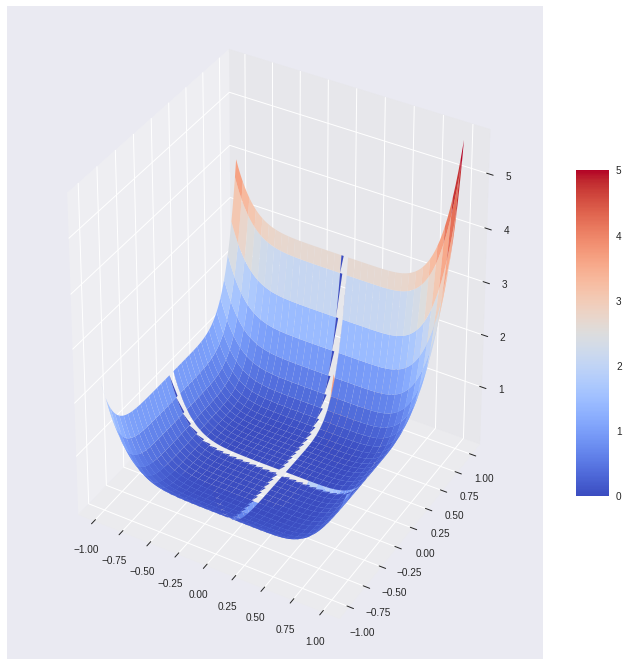

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')

xcurve = np.linspace(-1, 1, 101)
ycurve = np.linspace(-1, 1, 101)
xcurve, ycurve = np.meshgrid(xcurve, ycurve)

CsendesFunction = (xcurve**6)*(2+np.sin(1/xcurve)) + (ycurve**6)*(2+np.sin(1/ycurve))

surf = ax.plot_surface(xcurve, ycurve, CsendesFunction, cmap=cm.coolwarm, vmin=0, vmax=5)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.grid(True)

Για **D=2** θα φτιάξουμε πάλι τη συνάρτηση καταλληλόητας, τα άτομα και τον πληθυσμό, όπως κάναμε στο 1ο Μέρος. Θα τα εισάγουμε στο toolbox2 και θα τρέξουμε για αυτό το toolbox τις συναρτήσεις του 1ου Μέρους για να βρούμε τον καλύτερο συνδυασμό τελεστών και αλγορίθμου. 

Σημειώνουμε πως στις παραπάνω συναρτήσεις τροποποιήσαμε το **GOAL+DELTA** το οποίο τέθηκε σε **$0+10^{-20}$** αλλά και τις παραμέτρους στους τελεστές μετάλλαξης έτσι ώστε να είναι συναφείς με τους περιορισμούς της συγκεκριμένης συνάρτησης. Συγκεκριμένα θέσαμε:
* mutGaussian: mu=[0,0]
*mutUniformInt: low=[-1,-1], up=[1,1]

In [0]:
numVariables = 2 

creator.create( "Fitness2", base.Fitness , weights=(-1.0,))
creator.create( "IndividualContainer2", list, fitness= creator.Fitness2)

toolbox2 = base.Toolbox()
toolbox2.register( "InitialValues", np.random.uniform, -1, 1)
toolbox2.register( "indiv", tools.initRepeat, creator.IndividualContainer2, toolbox2.InitialValues, numVariables)
toolbox2.register( "population", tools.initRepeat, list , toolbox2.indiv)

In [0]:
def evalCendesFunction2d(indiv):
  summ = 0
  for i in range(0,2):
    if(indiv[i]==0):
      summ += 0
    else:
      summ = summ + (indiv[i]**6)*(2+np.sin(1/indiv[i]))
    
  return (summ,)

In [0]:
xmin = -1
xmax = 1
  
MIN_BOUND = np.array([xmin]*numVariables)
MAX_BOUND = np.array([xmax]*numVariables)

def feasible2( indiv ):
    if any(indiv < MIN_BOUND) or any(indiv > MAX_BOUND):
        return False
    return True

def distance2( indiv ) :
    dist = 0.0
    for i in range (len( indiv )) :
        penalty = 0
        if ( indiv [i] < MIN_BOUND[i]) : penalty = (MIN_BOUND[i] - indiv[i])**2
        if ( indiv [i] > MAX_BOUND[i]) : penalty = (indiv[i] - MAX_BOUND[i])**2
        dist = dist + penalty
    dist=np.sqrt(dist)
    return dist

In [0]:
toolbox2.register( "evaluate", evalCendesFunction2d)
toolbox2.decorate( "evaluate", tools.DeltaPenality(feasible2, 5, distance2))

In [0]:
statistics = np.chararray([96,9], itemsize=100)
statistics.fill(None)
d1=0
d2=0

In [0]:
###έχουμε αλλάξει τις παραμέτρους των τελεστών διασταύρωσης και μετάλλαξης στην register_toolbox() έτσι ώστε να ταιριάζουν με το πρόβλημα
###έχουμε αλλάξει και το GOAL+DELTA σε 10^(-20)

cxarray = [0.1, 0.8]
mutarray = [0.05, 0.5]
toursize = [3, 10]
evolve(toolbox2, 'cxUniform', 'mutGaussian', cxarray, mutarray, toursize)

cxarray = [0.1, 0.8]
mutarray = [0.05, 0.5]
evolve(toolbox2, 'cxUniform', 'mutUniformInt', cxarray, mutarray, toursize)

cxarray = [0.1, 1.0]
mutarray = [0.05, 0.5]
evolve(toolbox2, 'cxBlend', 'mutGaussian', cxarray, mutarray, toursize)

cxarray = [0.1, 1.0]
mutarray = [0.05, 0.5]
evolve(toolbox2, 'cxBlend', 'mutUniformInt', cxarray, mutarray, toursize)

In [127]:
df2 = print_stats(statistics)

                                            operators                        strategy successes  s.avg.min s.avg.evals s.avg.gens avg.evals     avg.min avg.time
0        cxUniformLow,mutGaussianLow,selTournamentLow            eaSimple 150 0.8 0.2         0       None        None       None     12718   8.082e-12   0.8516
1       cxUniformLow,mutGaussianLow,selTournamentHigh            eaSimple 150 0.8 0.2         0       None        None       None     12748   8.117e-10   0.9863
2       cxUniformLow,mutGaussianHigh,selTournamentLow            eaSimple 150 0.8 0.2         1  1.576e-21        1443         80     12743   2.927e-15   0.8656
3      cxUniformLow,mutGaussianHigh,selTournamentHigh            eaSimple 150 0.8 0.2         0       None        None       None     12689   6.126e-15        1
4       cxUniformHigh,mutGaussianLow,selTournamentLow            eaSimple 150 0.8 0.2         0       None        None       None     12752   8.473e-12   0.8524
5      cxUniformHigh,mutGaussianLo

In [129]:
df2.to_csv('results2.csv', index=False)
!ls

results2.csv  sample_data


Με ανάλογο σκεπτικό όπως στο 1ο Μέρος προχωράμε στο να βρούμε την καλύτερη στρατηγική εξέλιξης. 

Εδώ βλέπουμε πως σε πολλές περιπτώσεις αλγόριθμος βρίσκει ακριβή λύση. Άρα για να αποφασίσουμε για την καταλληλότερη στρατηγική θα προχωρήσουμε σε άλλα κριτήρια, όπως μικρότερος αριθμός αποτιμήσεων και λιγότερες γενειές κάτω από τις οποίες ο αλγόριθμος βρίσκει ελάχιστο κάτω από τον στόχο *GOAL+DELTA*.

Παρατηρούμε πως περισσότερες από μια στρατηγικές δίνουν ακριβές αποτέλεσμα αλλά και ίδιο μέσο όρο συνολικών αποτιμήσεων. Από αυτές διαλέγουμε εκείνη η οποία μας δίνει και μικρότερο μέσο όρο συνολικών αποτιμήσεων s.avg.evals. Αυτή είναι η:

**cxBlendLow,mutUniformIntHigh,selTournamentLow   eaMuPlusLambda 30 120 0.8 0.2         7  0.000e+00         390          3     12150   0.000e+00    1.013**

Δεν έχει νόημα να κάνουμε βελτιστοποίηση καθώς ο αλγόριθμος βρήκε το ακριβές ελάχιστο της συνάρτησης και μάλιστα σε 3 μόνο γενιές.

Θα τρέξουμε μια φορά τον βέλτιστο αλγόριθμο για πληθυσμό 500 ατόμων και 1000 γενιές και θα τυπώσουμε το ελάχιστο, τις συνολικές αποτιμήσεις και το χρόνο εκτέλεσης:

**Best individual is: [0, 0]
with fitness: (0.0,). Total evaluations are: 400500. Total run time is: 35.0041730404**


In [0]:
toolbox2.register("mate", tools.cxBlend, alpha = 0.1)
toolbox2.register("mutate", tools.mutUniformInt, low = [-1,-1], up = [1,1], indpb = 0.5)
toolbox2.register("select", tools.selTournament, tournsize = 3)

pop = toolbox2.population(n=500)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)

start_time = time.time()
pop, log = algorithms.eaMuPlusLambda(pop, toolbox2, mu = 100, lambda_ = 400, cxpb=0.8, mutpb=0.2, ngen=1000, stats=stats, halloffame=hof, verbose=False)
end_time = time.time() - start_time

In [131]:
evals = log.select("nevals")
print("Best individual is: %s\nwith fitness: %s. Total evaluations are: %s. Total run time is: %s" % (hof[0], hof[0].fitness, sum(evals), end_time))

Best individual is: [0, 0]
with fitness: (0.0,). Total evaluations are: 400500. Total run time is: 35.0041730404



### Για D=1, 10, 20, 40 και μεγαλύτερες διαστάσεις


Αρχικά θα τροποποιήσουμε τη συνάρτηση καταλληλότητας έτσι ώστε αυτή να καλύπτει οποιοδήποτε αριθμό διαστάσεων. Για το λόγο αυτό θα ορίσουμε μια global μεταβλητή **d** η οποία θα δίνει κάθε φορά τον αριθμό αυτό. 
___
Ορίζουμε 2 καινούριες συναρτήσεις.
Η **create_bounds()** φτιάχνει τα κατάλληλα όρια (με σωστές διαστάσεις) που χρησιμοποιούν οι feasible2 και distance2. Όσον αφορά τη συνάρτηση ποινής *DeltaPenalty* θα θέσουμε delta ανάλογο του αριθμού διαστάσεων, πχ *delta = 5d*.
____
Φτιάχνουμε ακόμα την **create_toolbox()** η οποία αρχικοποιεί συναρτήσει του **d** όλα τα εργαλεία που χρειαζόμαστε για να τρέξουμε τον γενετικό αλγόριθμο. Οι παράμετροι των γενετικών τελεστών είναι αυτές που βρέθηκαν παραπάνω από τη βελτιστοποίση σε 2 διαστάσεις.  
___
Οι υπόλοιπες είναι όμοιες με τις αντίστοιχες του 1ου Μέρους, με τις κατάλληλες τροποποιήσεις.

In [0]:
def evalCendesFunction2d(indiv):
  global d
  summ = 0
  for i in range(0,d):
    if(indiv[i]==0):
      summ += 0
    else:
      summ = summ + (indiv[i]**6)*(2+np.sin(1/indiv[i]))
    
  return (summ,)

In [0]:
xmin = -1
xmax = 1

def create_bounds(d):
  MIN_BOUND = np.array([xmin]*d)
  MAX_BOUND = np.array([xmax]*d)
  return MIN_BOUND, MAX_BOUND

def feasible2( indiv ):
    if any(indiv < MIN_BOUND) or any(indiv > MAX_BOUND):
        return False
    return True

def distance2( indiv ) :
    dist = 0.0
    for i in range (len(indiv)) :
        penalty = 0
        if ( indiv [i] < MIN_BOUND[i]) : penalty = (MIN_BOUND[i] - indiv[i])**2
        if ( indiv [i] > MAX_BOUND[i]) : penalty = (indiv[i] - MAX_BOUND[i])**2
        dist = dist + penalty
    dist=np.sqrt(dist)
    return dist

In [0]:
def create_toolbox():
  global d
  numVariables = d

  creator.create( "Fitness3", base.Fitness , weights=(-1.0,))
  creator.create( "IndividualContainer3", list, fitness= creator.Fitness3)

  toolbox3 = base.Toolbox()
  toolbox3.register( "InitialValues", np.random.uniform, -1, 1)
  toolbox3.register( "indiv", tools.initRepeat, creator.IndividualContainer3, toolbox3.InitialValues, numVariables)
  toolbox3.register( "population", tools.initRepeat, list , toolbox3.indiv)
  
  toolbox3.register( "evaluate", evalCendesFunction)
  toolbox3.decorate( "evaluate", tools.DeltaPenality(feasible2, 5*d, distance2))
  
  toolbox3.register("mate", tools.cxBlend, alpha = 0.1)
  toolbox3.register("mutate", tools.mutUniformInt, low = [-1]*d, up = [1]*d, indpb = 0.5)
  toolbox3.register("select", tools.selTournament, tournsize = 3)
  
  return toolbox3

In [0]:
def rounds_analysis_(rounds, toolbox):
  times = []
  mins = []
  evals = []
  evs = []
  
  goal_delta = 0
  successes = 0
  for i in range(rounds):
    
    pop = toolbox.population(n=300)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    
    start_time = time.time()
    pop, log = algorithms.eaMuPlusLambda(pop, toolbox, mu = 100, lambda_ = 200, cxpb=0.8, mutpb=0.2, ngen=200, stats=stats, verbose=False)
    round_time = time.time() - start_time
    
    times.append(round_time)
    minn = log.select("min")
    mins.append(minn[-1])
    evs = log.select("nevals")
    evals += evs
    if(minn[-1]<=goal_delta):
      #print("Success!")
      successes += 1
    
    
  avg_time = np.mean(times)
  avg_min = np.mean(mins)
  avg_evals = sum(evals)/rounds
  
  return successes, avg_min, avg_evals, avg_time
    

In [0]:
def update_stats_(dimension, successes, avg_min, avg_evals, avg_time):
  global d1
  global d2
  global stats
  stats[d1][d2] = dimension
  stats[d1][d2+1] = successes
  stats[d1][d2+2] = '%.3e'%avg_min
  stats[d1][d2+3] = avg_evals
  stats[d1][d2+4] = '%.4g'%avg_time
  
  d1 += 1
  d2=0

In [0]:
def print_stats_(stats):
  import pandas
  headers = ['dimension', 'successes', 'avg.min', 'avg.evals', 'avg.time']
  df = pandas.DataFrame(stats, columns = headers)
  print(df.to_string())
  return df

In [0]:
stats = np.chararray([7,5], itemsize=100)
stats.fill(None)
d1=0
d2=0

Για καθεμία από τις διαστάσεις του πίνακα dimensions τρέχουμε τον ΓΑ για 15 γύρους και 200 γενιές, σε πληθυσμό 300 ατόμων και αποθηκεύουμε τα αποτελέσματα στον πίνακα stats. 

Η αρχική βελτιστοποίηση μας έδειξε πως ο αλγόριθμος βρίσκει ακριβή λύση (και μάλιστα σε πολύ λίγες γενιές, οπότε θα μπορούσαμε να έχουμε θέσει και λιγότερες), συνεπώς έχουμε θέσει τη σταθερά **GOAL+DELTA** ίση με 0. 

In [0]:
dimension= [1, 10, 20, 40, 50, 75, 100]

for d in dimension:
  MIN_BOUND, MAX_BOUND = create_bounds(d)
  toolbox3 = create_toolbox()

  successes, avg_min, avg_evals, avg_time = rounds_analysis_(15, toolbox3)
  update_stats_(d, successes, avg_min, avg_evals, avg_time)
  

In [147]:
print_stats_(stats)

  dimension successes    avg.min avg.evals avg.time
0         1        15  0.000e+00     40300    3.234
1        10        15  0.000e+00     40300    5.188
2        20        15  0.000e+00     40300    6.929
3        40        15  0.000e+00     40300    9.618
4        50        15  0.000e+00     40300     10.8
5        75        15  0.000e+00     40300    14.05
6       100        15  0.000e+00     40300    17.44


,dimension,successes,avg.min,avg.evals,avg.time
0,1,15,0.000e+00,40300,3.234
1,10,15,0.000e+00,40300,5.188
2,20,15,0.000e+00,40300,6.929
3,40,15,0.000e+00,40300,9.618
4,50,15,0.000e+00,40300,10.8
5,75,15,0.000e+00,40300,14.05
6,100,15,0.000e+00,40300,17.44


###Παρατηρήσεις

Το να βρούμε ακριβή λύση είναι αναμενόμενο αν σκεφτεί κανείς πως σε αυτό μας βοηθά πολύ ο τελεστής μετάλλαξης (**mutUniformInt**) που έχουμε διαλέξει. Αυτός αντικαθιστά ένα γονίδιο (με πιθανότητα indpb) με έναν ακέραιο αριθμό από το διάστημα [-1,1]. Συνεπώς, κάθε φορά που γίνεται μετάλλαξη έχει να αποφασίσει ανάμεσα σε 3 αριθμούς, -1, 0, 1. Για μεγάλο πληθυσμό ή μεγάλες διαστάσεις δεν είναι καθόλου απίθανο ένα ή πειρσσότερα γονίδια ενός ατόμου να αντικατασταθούν με 0. Για πολλές γενιές δεν είναι απίθανο όλα τα γονίδια ενός ατόμου να αντικατασταθούν με 0 και ο αλγόριθμος να βρει έτσι την ακριβή λύση. 

Παρατηρούμε ακόμα πως ο μέσος αριθμός αποτιμήσεων είναι ίδιος για όλα τα παραδείγματα και συμπεραίνουμε πως αυτός είναι ανεξάρτητος από τις διαστάσεις. Αυτό μπορεί να συμβαίνει επειδή ο αλγόριθμός μας βρίσκει γρήγορα λύση (σε μικρό αριθμό γενεών) και σταδιακά ο πληθυσμός εξελίσσεται στον "ανώτερο" εξελικτικά (δηλαδή όλα τα άτομά του δίνουν το ζητούμενο ελάχιστο), συνεπώς δε χρειάζονται περαιτέρω αποτιμήσεις από εκεί και έπειτα. 

Όσο οι διαστάσεις αυξάνονται αυξάνεται και ο μέσος χρόνος εκτέλεσης κάθε γύρου, πράγμα επίσης αναμενόμενο.
___
Αν το πρόβλημά μας δεν έβρισκε τη βέλτιστη λύση, για σταθερό αριθμό γενεών και για μεγάλες διαστάσεις μια σκέψη θα ήταν να αυξήσουμε τον πληθυσμό αλλά και τους γύρους. Μεγαλύτερος πληθυσμός θα εξασφάλιζε περισσότερες αποτιμήσεις όπως και περισσότερες διασταυρώσεις και μεταλλάξεις. Ακόμα, ο μηχανισμός φυσικής επιλογής θα είχε περισσότερα άτομα από τα οποία θα μπορούσε να διαλέξει. Περισσότεροι γύροι θα εξασφάλιζαν περισσότερες ελάχιστες τιμές οι οποίες ίσως επιδρούσαν θετικά στον μέσο όρο των ελαχίστων και πλησίαζαν όλο και περισσότερο στην πραγματική του τιμή.